In [2]:
import numpy as np
import matplotlib.pyplot as plt

1) Максимальное значение на траектории: 19.0
   Минимальное значение на траектории: -561.0
2) Индекс, начиная с которого сделано больше 10 шагов в одну сторону: 1
3) Индекс, начиная с которого сделано максимальное количество шагов в одну сторону: 20


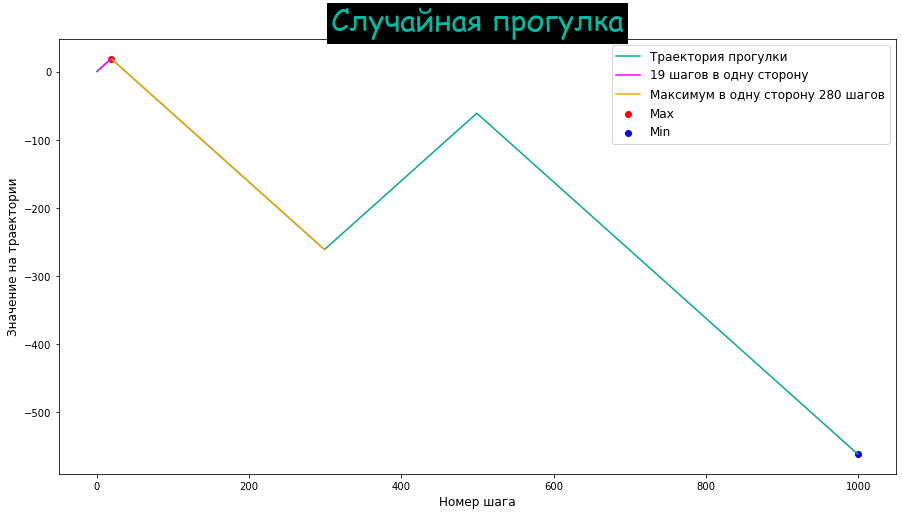

In [4]:
np.random.seed(42)
# np.random.seed(88) пример, когда участки пути из 2 и 3 пункта задачи не совпадают
#Создаем модель случайной прогулки
randomwalk = np.random.choice([-1, 1], 1000)   
randomwalk[0] = 0
cum_randomwalk = np.cumsum(randomwalk)


### мой тест

my_list = np.zeros(1000)
my_list[1:20] = 1
my_list[20:50] = -1
my_list[50:100] = -1
my_list[100:300] = -1
my_list[300:500] = 1
my_list[500:1000] = -1

my_list_cum = np.cumsum(my_list)
randomwalk = my_list
cum_randomwalk = my_list_cum




#Ищем максимум и минимум
max_walk = np.max(cum_randomwalk)
min_walk = np.min(cum_randomwalk)
#Создаем массивы координат для всех max и min, чтобы потом их нарисовать
max_x = np.where(cum_randomwalk == max_walk)
max_x = max_x[0]
min_x = np.where(cum_randomwalk == min_walk)
min_x = min_x[0]
max_y = np.full_like(max_x, max_walk)
min_y = np.full_like(min_x, min_walk)
s = 0 #Счётчик совпадающих шагов, к нему нужно прибавить 1, чтобы получить длину искомого пути
count_max = 0 #Счётчик максимального пути в одном направлении
ten_steps_index = 0 #Задаем заранее 0 для проверок, так как максимальный путь может оказаться меньше 10 шагов
#Цикл от 1 до 999, так как 0-й элемент проверять не надо, а на последнем шаге 998-й будет сравнен с 999-м
for i in range(1, 999):  
    if randomwalk[i] == randomwalk[i+1]:
        s += 1
    else: #Как только встречаем шаг, который не совпадает с предыдущим, начинаем проверки
        if count_max < (s+1): #Если встречаем путь в одну сторону длиннее, чем был, то перезаписываем значения
            count_max = s+1
            max_steps_index = i-s
            max_steps_x = np.arange(max_steps_index, (max_steps_index+count_max))
        if s >= 9 and ten_steps_index == 0: #Один раз запишем значения для пути >= 10 или не запишем вообще
            ten_steps_index = i-s
            ten_steps_x = np.arange(ten_steps_index, (ten_steps_index+s+1))
        s = 0
#Задаем оформление графика, сам график и вывод ответов
fig, ax = plt.subplots(figsize = (15,8))
ax.set_title('Случайная прогулка', fontfamily = 'fantasy', fontstyle = 'italic', 
             fontsize = 30, c = '#00b9a0', backgroundcolor = 'black')
ax.set_xlabel('Номер шага', fontsize = 12)
ax.set_ylabel('Значение на траектории', fontsize = 12)
ax.plot(cum_randomwalk, c = '#02a892', label = 'Траектория прогулки')
ax.scatter(max_x, max_y, c = 'red', label = 'Max')
ax.scatter(min_x, min_y, c = 'blue', label = 'Min')
print('1) Максимальное значение на траектории: ' + str(max_walk))
print('   Минимальное значение на траектории: ' + str(min_walk))
if ten_steps_index != 0:
    ax.plot(ten_steps_x, cum_randomwalk[ten_steps_x], c = 'magenta', label = str(ten_steps_x.size) + ' шагов в одну сторону')
    print('2) Индекс, начиная с которого сделано больше 10 шагов в одну сторону: ' + str(ten_steps_index))
else:
    print('2) Не было сделано 10 шагов в одном направлении')
print('3) Индекс, начиная с которого сделано максимальное количество шагов в одну сторону: ' + str(max_steps_index))
ax.plot(max_steps_x, cum_randomwalk[max_steps_x], c = 'orange', 
        label = 'Максимум в одну сторону ' + str(max_steps_x.size) + ' шагов')
#Подписи сделаны в виде легенды, так как часто рядом несколько точек минимума или максимума, 
# надписи наслаиваются, и это выглядит не очень красиво:(
ax.legend(fontsize = 12)
plt.show()